In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
mm_teams_merged_df = pd.read_csv("../Module 20 NCAA stats/mm_teams_merged.csv")
mm_teams_merged_df.head()

,Team,Assists Per. Game Rank,Assist Turnover Ratio Rank,BlocksPerGame Rank,Field Goal % Rank,Field Goal % Defense Rank,Fouls Per Game Rank,Free Throw % Rank,Rebound Margin Rank,Scoring Defense Rank,...,Conference_Pac-12,Conference_Patriot,Conference_SEC,Conference_SWAC,Conference_SoCon,Conference_Southland,Conference_Summit League,Conference_Sun Belt,Conference_WAC,Conference_WCC
0,A&M-Corpus Christi,44,141,343,156,90,349,100,51,200,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Akron,278,177,162,70,119,192,272,64,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,66,185,36,184,200,304,132,76,320,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arizona,1,17,8,4,10,319,95,9,137,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arkansas,116,110,71,218,58,323,32,89,145,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Generate our column variable list
column_names = list(mm_teams_merged_df.columns.values.tolist())
column_names

['Team',
 'Assists Per. Game Rank',
 'Assist Turnover Ratio Rank',
 'BlocksPerGame Rank',
 'Field Goal % Rank',
 'Field Goal % Defense Rank',
 'Fouls Per Game Rank',
 'Free Throw % Rank',
 'Rebound Margin Rank',
 'Scoring Defense Rank',
 'Scoring Margin Rank',
 'Scoring Offense Rank',
 'Steals Per Game Rank',
 'Three Pt FG Defense Rank',
 'Three Pt FG % Rank',
 'Three Pt FG Per Game Rank',
 'Turnover Margin Rank',
 'Turnover Per Game Rank',
 'Win-Loss Rank',
 'Tournament Wins',
 'Conference_AAC',
 'Conference_ACC',
 'Conference_ASUN',
 'Conference_America East',
 'Conference_Atlantic 10',
 'Conference_Big 12',
 'Conference_Big East',
 'Conference_Big Sky',
 'Conference_Big South',
 'Conference_Big Ten',
 'Conference_Big West',
 'Conference_C-USA',
 'Conference_CAA',
 'Conference_Horizon',
 'Conference_Ivy League',
 'Conference_MAAC',
 'Conference_MAC',
 'Conference_MEAC',
 'Conference_MVC',
 'Conference_Mountain West',
 'Conference_NEC',
 'Conference_None',
 'Conference_OVC',
 'Confere

In [22]:
X = mm_teams_merged_df['Assists Per. Game Rank'].values.reshape(-1,1)
y = mm_teams_merged_df['Tournament Wins'].values.reshape(-1,1)

In [23]:
X

array([[ 44],
       [278],
       [ 66],
       [  1],
       [116],
       [ 60],
       [ 24],
       [292],
       [111],
       [299],
       [179],
       [  8],
       [ 91],
       [153],
       [ 69],
       [198],
       [ 11],
       [138],
       [  3],
       [ 14],
       [ 41],
       [ 72],
       [ 67],
       [ 20],
       [ 86],
       [ 36],
       [ 15],
       [ 77],
       [ 54],
       [188],
       [ 22],
       [ 25],
       [ 93],
       [ 30],
       [ 95],
       [160],
       [ 60],
       [121],
       [209],
       [ 53],
       [103],
       [202],
       [158],
       [ 13],
       [ 76],
       [ 40],
       [139],
       [221],
       [255],
       [172],
       [335],
       [ 44],
       [ 89],
       [128],
       [ 12],
       [320],
       [125],
       [159],
       [170],
       [110],
       [102],
       [ 42],
       [262],
       [ 87],
       [307],
       [100],
       [302],
       [247],
       [  5],
       [103],
       [268],
      

In [24]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [25]:
X_train

array([[  6],
       [ 90],
       [232],
       [235],
       [335],
       [ 64],
       [151],
       [ 81],
       [ 67],
       [202],
       [178],
       [ 37],
       [135],
       [311],
       [164],
       [ 53],
       [141],
       [ 52],
       [184],
       [ 96],
       [ 67],
       [157],
       [116],
       [ 26],
       [ 76],
       [208],
       [243],
       [254],
       [151],
       [ 53],
       [113],
       [192],
       [241],
       [239],
       [144],
       [158],
       [ 40],
       [  3],
       [ 77],
       [279],
       [ 99],
       [ 35],
       [223],
       [153],
       [ 61],
       [  9],
       [ 25],
       [  3],
       [ 58],
       [263],
       [ 10],
       [ 71],
       [171],
       [197],
       [297],
       [155],
       [  6],
       [124],
       [  7],
       [ 31],
       [ 49],
       [125],
       [  2],
       [171],
       [220],
       [ 60],
       [ 24],
       [ 98],
       [200],
       [207],
       [ 65],
      

In [26]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-1.23395418],
       [-0.27193664],
       [ 1.3543311 ],
       [ 1.38868887],
       [ 2.53394784],
       [-0.56970397],
       [ 0.42667133],
       [-0.37500995],
       [-0.5353462 ],
       [ 1.01075341],
       [ 0.73589126],
       [-0.8789239 ],
       [ 0.2434299 ],
       [ 2.25908569],
       [ 0.575555  ],
       [-0.69568246],
       [ 0.31214544],
       [-0.70713505],
       [ 0.80460679],
       [-0.2032211 ],
       [-0.5353462 ],
       [ 0.49538687],
       [ 0.02583069],
       [-1.00490238],
       [-0.4322729 ],
       [ 1.07946895],
       [ 1.48030959],
       [ 1.60628808],
       [ 0.42667133],
       [-0.69568246],
       [-0.00852708],
       [ 0.89622751],
       [ 1.45740441],
       [ 1.43449923],
       [ 0.3465032 ],
       [ 0.50683946],
       [-0.84456613],
       [-1.26831195],
       [-0.42082031],
       [ 1.89260282],
       [-0.16886333],
       [-0.90182908],
       [ 1.25125779],
       [ 0.44957651],
       [-0.60406174],
       [-1

### apply random over sampling

In [ ]:
# implement random oversampling
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=1)
# X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

# Counter(y_resampled)

### apply_model

Linear Regression

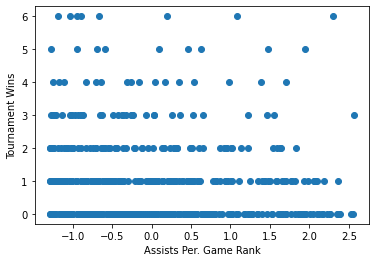

In [28]:
# X_data = mm_teams_merged_df['Assists Per. Game Rank']
# y_data = mm_teams_merged_df['Tournament Wins']
plt.scatter(X_train_scaled, y_train)
plt.xlabel('Assists Per. Game Rank')
plt.ylabel('Tournament Wins')
plt.show()